# Exploratory Data Analysis ENEM2019 v1.0

This notebook will contain an exploratory data analysis (EDA) of ENEM2019 (last year before COVID-19) dataset, one of the most important steps in any data science project. The goal of this notebook is to provide a quick overview of the data and the methods used to explore it. The final objective is to select wich variables will be used as features in the machine learning models and wich variable will be used as a target variable.

## 1. Imports

In [8]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

pd.set_option('display.max_columns', None)
sns.set_palette('Paired')
sns.set_style("whitegrid")
mpl.rcParams['font.size'] = 14

## 2. Reading Data

In [9]:
data = pd.read_parquet('../data/processed/v0-enem-processed-20220617.parquet').query('enem_year == 2019')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10006 entries, 9884 to 19889
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           10006 non-null  int64  
 1   enem_year                    10006 non-null  int64  
 2   age                          10006 non-null  object 
 3   sex                          10006 non-null  object 
 4   marital_status               10006 non-null  object 
 5   color_race                   10006 non-null  object 
 6   high_school_status           10006 non-null  object 
 7   year_completion_high_school  10006 non-null  int64  
 8   school_type                  10006 non-null  object 
 9   id_city_school               2250 non-null   float64
 10  city_school                  2250 non-null   object 
 11  state_school                 2250 non-null   object 
 12  id_city_test                 10006 non-null  int64  
 13  city_test    

## 3. Exploratory Data Analysis

### 3.1 Check NULL Values

FileNotFoundError: [Errno 2] No such file or directory: '..reports/figures/1.0-exploratory-data-analysis-enem2019/missing_values.jpeg'

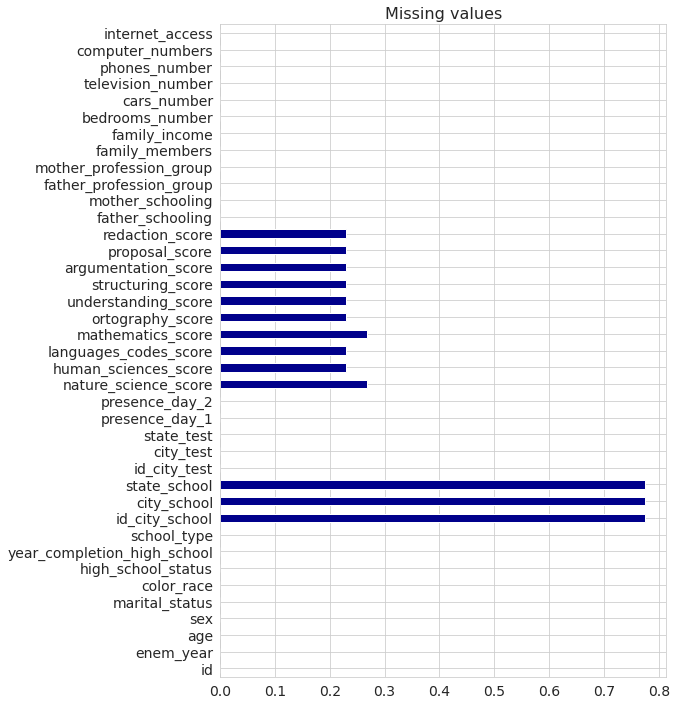

In [7]:
(data.isna().sum() / data.shape[0]).plot.barh(figsize = (8, 12), color = 'darkblue')
plt.title('Missing values', fontsize = 16)
plt.savefig('../reports/figures/1.0-exploratory-data-analysis-enem2019/missing_values.jpeg', bbox_inches = 'tight', dpi = 600) 
plt.show()

The dataset has a lot of missing values. Especially in score data and id_city_school. In the first case, it occurs because the score data is not filled if the student didn't take the test. In the second case, seems that is mandatory to fill this field only the candidates that high_school_status is equal to "Ends in the current year".

*  The id_city_school will be removed from the dataset because it is not useful for the modelling;
*  The candidates that have null values in score data will be removed from the dataset;

### 3.2 Missed candidates

### 3.2.1 By Family Income

In [ ]:
# ordered labels
income_order = [
    'No income',
    'Less than BRL 1.045,00',
    'BRL 1.045,01 to BRL 1.567,50',
    'BRL 2.090,01 to BRL 2.612,50',
    'BRL 1.567,51 to BRL 2.090,00',
    'BRL 2.612,51 to BRL 3.135,00',
    'BRL 3.135,01 to BRL 4.180,00',
    'BRL 4.180,01 to BRL 5.225,00',
    'BRL 5.225,01 to BRL 6.270,00',
    'BRL 6.270,01 to BRL 7.315,00',
    'BRL 7.315,01 to BRL 8.360,00',
    'BRL 8.360,01 to BRL 9.405,00',
    'BRL 9.405,01 to BRL 10.450,00',
    'BRL 10.450,01 to BRL 12.540,00',
    'BRL 12.540,01 to BRL 15.675,00',
    'BRL 15.675,01 to BRL 20.900,00',
    'More than BRL 20.900,00'
]

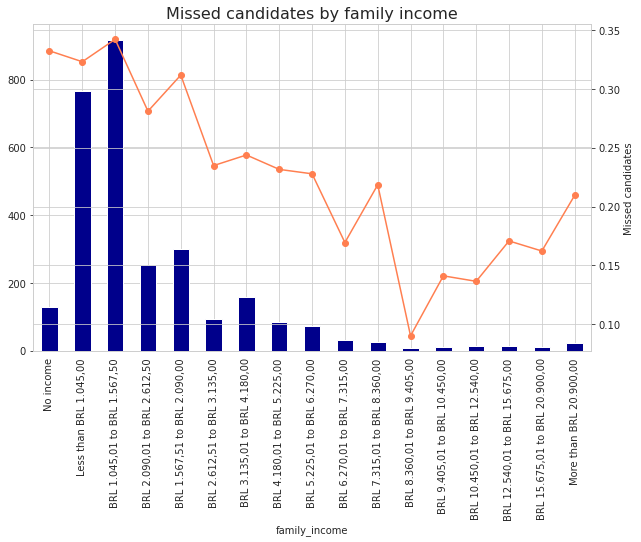

In [ ]:
# missed in either first or second day of exam
temp_data = data.query('(presence_day_1 + presence_day_2) != 2')

# grouping by family income
missed_candidates = temp_data.groupby('family_income').size()[income_order]
total_candidates = data.groupby('family_income').size()[income_order]

# count of missed candidates
bar_plot = missed_candidates.plot.bar(figsize = (8, 6), color = 'darkblue')

# relative missed candidates
line_plot = bar_plot.twinx()
(missed_candidates/total_candidates).plot(figsize = (10, 6), color = 'coral', marker = 'o', ax = line_plot)

plt.title('Missed candidates by family income', fontsize = 16)
plt.ylabel('Missed candidates')
plt.savefig('../reports/figures/1.0-exploratory-data-analysis-enem2019/missed_candidates_by_family_income.jpeg', bbox_inches = 'tight', dpi = 600)
plt.show()

### 3.2.2 By Color and Race

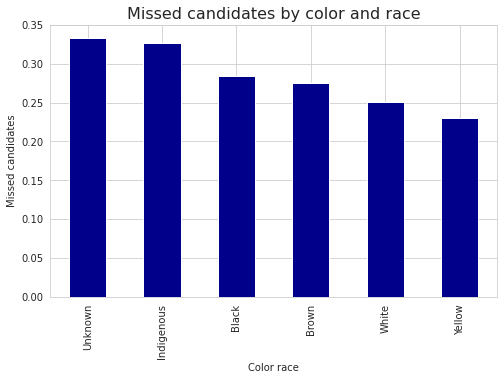

In [ ]:
missed_candidates = temp_data.groupby('color_race').size()
total_candidates = data.groupby('color_race').size()

# count of missed candidates
bar_plot = (missed_candidates/total_candidates).sort_values(ascending = False).plot.bar(figsize = (8, 5), color = 'darkblue')

plt.title('Missed candidates by color and race', fontsize = 16)
plt.xlabel('Color race')
plt.ylabel('Missed candidates')
plt.savefig('../reports/figures/1.0-exploratory-data-analysis-enem2019/missed_candidates_by_color_race.jpeg', bbox_inches = 'tight', dpi = 600)
plt.show()

### 3.2.3 By School Type

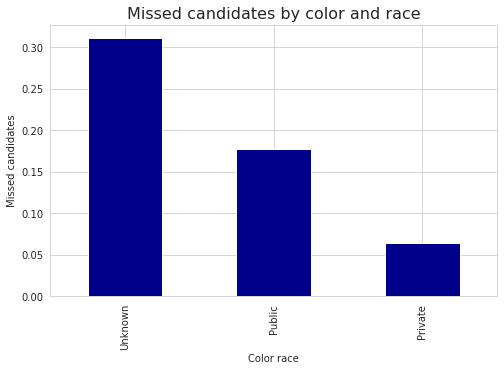

In [ ]:
missed_candidates = temp_data.groupby('school_type').size()
total_candidates = data.groupby('school_type').size()

# count of missed candidates
bar_plot = (missed_candidates/total_candidates).sort_values(ascending = False).plot.bar(figsize = (8, 5), color = 'darkblue')

plt.title('Missed candidates by color and race', fontsize = 16)
plt.xlabel('Color race')
plt.ylabel('Missed candidates')
plt.savefig('../reports/figures/1.0-exploratory-data-analysis-enem2019/missed_candidates_by_school_type.jpeg', bbox_inches = 'tight', dpi = 600)
plt.show()

### 3.3 School Type Distribution

In [ ]:
# filter out candidates that failed in ENEM in one of the two days
# each presence day has value 1 then (presence_day_1 + presence_day_2) is equal 2
present_candidates = data.query('(presence_day_1 + presence_day_2) == 2')
present_candidates.head(5)

,id,enem_year,age,sex,marital_status,color_race,high_school_status,year_completion_high_school,school_type,id_city_school,city_school,state_school,id_city_test,city_test,state_test,presence_day_1,presence_day_2,nature_science_score,human_sciences_score,languages_codes_score,mathematics_score,ortography_score,understanding_score,structuring_score,argumentation_score,proposal_score,redaction_score,father_schooling,mother_schooling,father_profession_group,mother_profession_group,family_members,family_income,bedrooms_number,cars_number,television_number,phones_number,computer_numbers,internet_access
9886,190001006425,2019,Between 26 and 30 years-old,M,Single,Yellow,Completed High School,9,Unknown,NaN,None,None,1500602,Altamira,PA,1,1,464.3,543.0,510.5,622.9,100.0,120.0,120.0,100.0,120.0,560.0,Didn't complete Elementary School,Didn't complete Elementary School,Group A,Group A,4.0,"BRL 1.045,01 to BRL 1.567,50",D,A,B,D,A,No
9887,190001007405,2019,20 years-old,F,Single,Brown,Completed High School,2,Unknown,NaN,None,None,1501303,Barcarena,PA,1,1,520.9,577.0,581.9,536.9,160.0,180.0,180.0,160.0,140.0,820.0,Completed High School,Completed College,Group C,Group F,5.0,"BRL 2.612,51 to BRL 3.135,00",C,A,C,D,B,Yes
9890,190001009977,2019,19 years-old,F,Single,Brown,Completed High School,1,Unknown,NaN,None,None,1505502,Paragominas,PA,1,1,441.4,486.0,491.3,429.4,80.0,40.0,40.0,100.0,0.0,260.0,Completed Elementary School,Didn't complete Elementary School,Group A,Group A,5.0,No income,C,A,B,B,B,Yes
9891,190001010202,2019,20 years-old,F,Single,White,Completed High School,2,Unknown,NaN,None,None,1507953,Tailandia,PA,1,1,426.8,470.0,536.6,491.9,120.0,120.0,100.0,120.0,80.0,540.0,Completed High School,Completed Elementary School,Group C,Group B,3.0,"Less than BRL 1.045,00",C,A,C,D,A,Yes
9892,190001010272,2019,Less than 17 years-old,F,Single,White,Will complete High School the following year,0,Unknown,NaN,None,None,1501402,Belem,PA,1,1,482.2,563.8,560.8,531.9,140.0,120.0,120.0,120.0,20.0,520.0,Completed Graduate,Completed High School,Group F,Group F,3.0,"BRL 1.567,51 to BRL 2.090,00",C,B,B,C,B,Yes


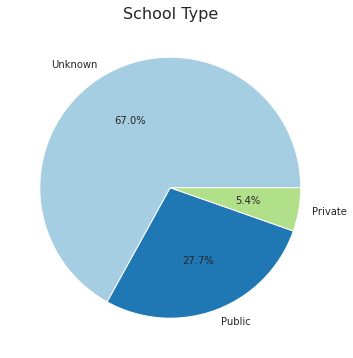

In [ ]:
present_candidates.school_type.value_counts().plot.pie(figsize = (6, 6), autopct = '%1.1f%%')

plt.title('School Type', fontsize = 16)
plt.ylabel(None)
plt.savefig('../reports/figures/1.0-exploratory-data-analysis-enem2019/school_type_all_candidates.jpeg', bbox_inches = 'tight', dpi = 600)
plt.show()

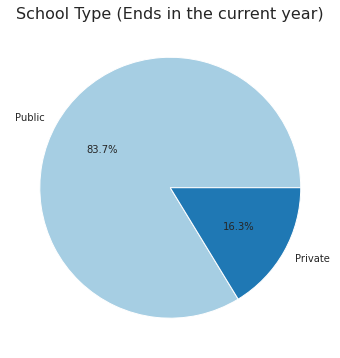

In [ ]:
present_candidates.query('high_school_status == "Ends in the current year"').school_type.value_counts().plot.pie(figsize = (6, 6), autopct = '%1.1f%%')

plt.title('School Type (Ends in the current year)', fontsize = 16)
plt.ylabel(None)
plt.savefig('../reports/figures/1.0-exploratory-data-analysis-enem2019/school_type_ends_current_year.jpeg', bbox_inches = 'tight', dpi = 600)
plt.show()

As explained in the previous observation, the school_type variable is filled just if the student is a high school student. The majority of the candidates study in public high schools.

### 3.4 Sex Distribution


#### 3.4.1 All dataset

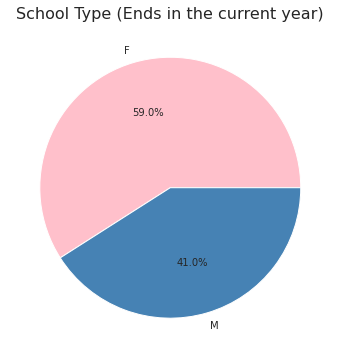

In [ ]:
data.sex.value_counts().plot.pie(figsize = (6, 6), autopct = '%1.1f%%', colors = ['pink', 'steelblue'])

plt.title('School Type (Ends in the current year)', fontsize = 16)
plt.ylabel(None)
plt.savefig('../reports/figures/1.0-exploratory-data-analysis-enem2019/school_type_sex.jpeg', bbox_inches = 'tight', dpi = 600)
plt.show()

Most candidates in our dataset are women but don't have a big difference between these two classes.

#### 3.4.2 Presents By Family Income

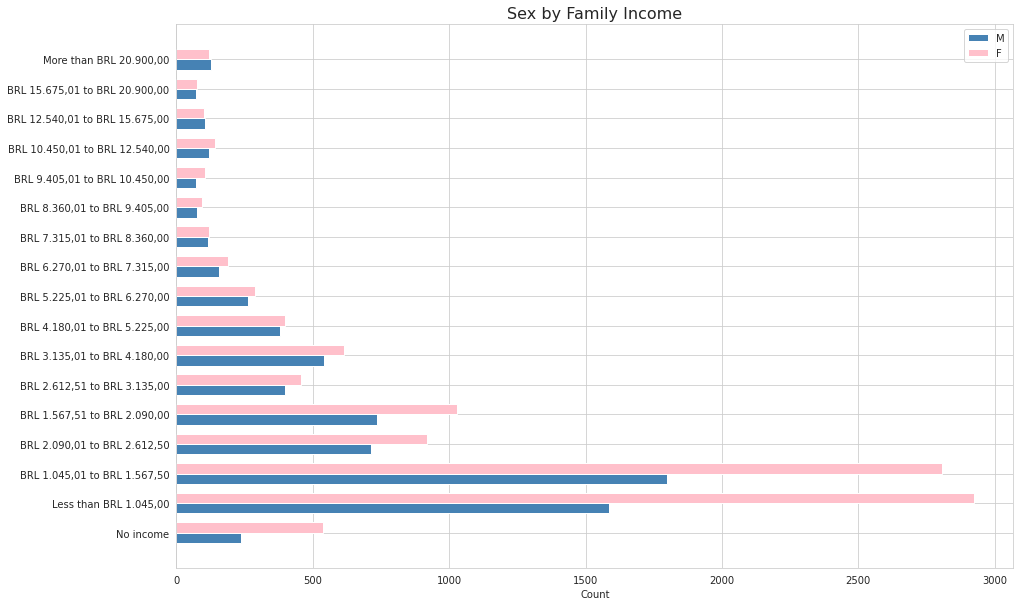

In [ ]:
sex_family_income_presents = present_candidates.groupby(['family_income', 'sex']).size()[income_order]

# number of men and women splited
men = sex_family_income_presents.loc[(income_order, 'M')].values
women = sex_family_income_presents.loc[(income_order, 'F')].values

fig, ax = plt.subplots(figsize = (15, 10))
men_bars = ax.barh(np.arange(len(income_order)) - 0.35 / 2, men, 0.35, label = 'M', color = 'steelblue')
women_bars = ax.barh(np.arange(len(income_order)) + 0.35 / 2, women, 0.35, label = 'F', color = 'pink')

# plot labels
ax.set_title('Sex by Family Income', fontsize = 16)
ax.set_xlabel('Count')
ax.legend()

# seting the income in y ticks
ax.set_yticks(np.arange(len(income_order)), income_order)


plt.savefig('../reports/figures/1.0-exploratory-data-analysis-enem2019/present_candidates_sex_family_income.jpeg', bbox_inches = 'tight', dpi = 600)
plt.show()

There is a high concentration of female candidates with low family income. But as we can see, how much bigger the income family, the more the difference between the gender decrease.